# Testing Dose Calculator Function
I'll do initial testing stuff and miscellaneous things here and then add them into `dose_calculator_tests.py`.

In [1]:
%pylab ipympl 
%load_ext autoreload
import siddon as sd
import imshow_slider as ims
from topas2numpy import BinnedResult
import pickle

Populating the interactive namespace from numpy and matplotlib


In [3]:
# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 8
Ny = 8
Nz = 8

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 2
dy = 2
dz = 2

# initial and final coordinates of the beam
x1,x2 = (1,1)
y1,y2 = (1,1)
z1,z2 = (-9,9)

# initial plane coordinates
xplane1 = -3
yplane1 = -3
zplane1 = -3

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**8 # photon/cm^2
filename = 'energy_absorption_coeff.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (1,1,1) # cm 

siddon = sd.Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1))
terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename)
dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename,kernelname,kernel_size)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [10]:
terma

[{'d': 0.0, 'indices': (3, 3, 1), 'TERMA': 6520259.708920799},
 {'d': 2.0, 'indices': (3, 3, 1), 'TERMA': 6520259.708920799},
 {'d': 2.000000000000001, 'indices': (3, 3, 2), 'TERMA': 4634434.605201179},
 {'d': 1.999999999999999, 'indices': (3, 3, 3), 'TERMA': 3294038.1317174756},
 {'d': 0.0, 'indices': (3, 3, 4), 'TERMA': 2341318.44282173}]

### Slider to Look at 3D Stuff

In [19]:
data = BinnedResult(kernelname).data['Sum']

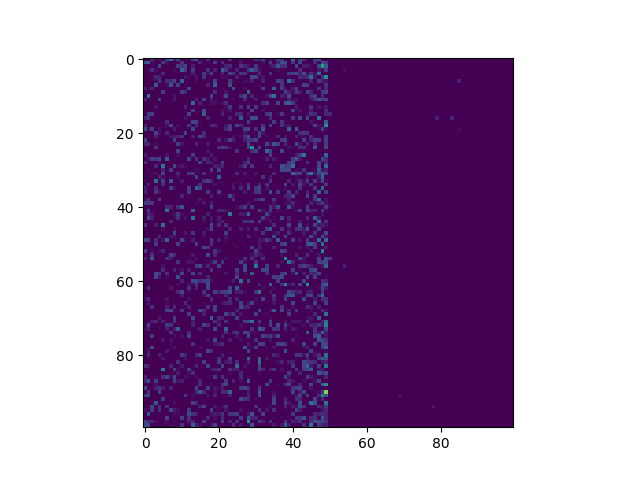

In [20]:
fig,ax,controls = ims.slider(data)

In [23]:
my_dose_array = pickle.load(open('dose_im_array.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

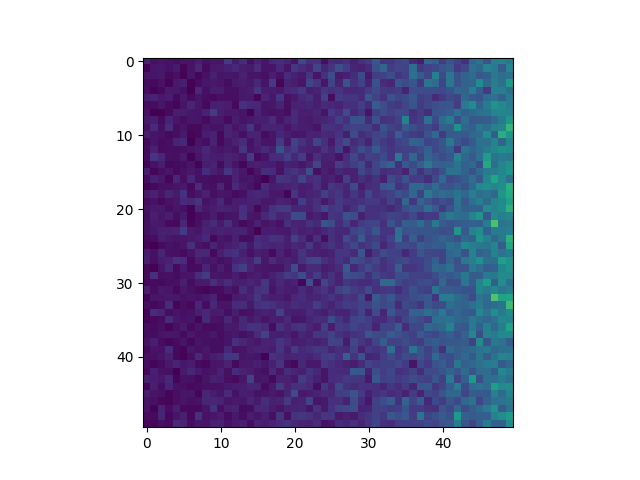

In [25]:
fig,ax,controls = ims.slider(mc_dose_array)

### Tests for Superposition

In [10]:
test_kernel = array([[[0,0,0],[0,0.1,0],[0,0,0]],
                     [[0,0.1,0],[0.1,0.4,0.1],[0,0.1,0]],
                     [[0,0,0],[0,0.1,0],[0,0,0]]])

In [11]:
test_array_1 = array([[[1,1],[1,1]],
                      [[1,1],[1,1]]])
voxel_info_1 = []
n=0
for x in range(len(test_array_1)):
    for y in range(len(test_array_1[0])):
        for z in range(len(test_array_1[0][0])):
            voxel_info_1.append({})
            voxel_info_1[n]['indices'] = (x+1,y+1,z+1)
            voxel_info_1[n]['TERMA'] = (1,1,1)
            n += 1

voxel_info_1

[{'indices': (1, 1, 1), 'TERMA': (1, 1, 1)},
 {'indices': (1, 1, 2), 'TERMA': (1, 1, 1)},
 {'indices': (1, 2, 1), 'TERMA': (1, 1, 1)},
 {'indices': (1, 2, 2), 'TERMA': (1, 1, 1)},
 {'indices': (2, 1, 1), 'TERMA': (1, 1, 1)},
 {'indices': (2, 1, 2), 'TERMA': (1, 1, 1)},
 {'indices': (2, 2, 1), 'TERMA': (1, 1, 1)},
 {'indices': (2, 2, 2), 'TERMA': (1, 1, 1)}]

In [12]:
sd.Superposition(test_kernel,(2,2,2),(3,3,3),(2,2,2),voxel_info_1)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


[{'indices': (1.0, 1.0, 1.0), 'energy': array([0., 0., 0.])},
 {'indices': (1.0, 1.0, 2.0), 'energy': array([0., 0., 0.])},
 {'indices': (1.0, 2.0, 1.0), 'energy': array([0., 0., 0.])},
 {'indices': (1.0, 2.0, 2.0), 'energy': array([0., 0., 0.])},
 {'indices': (2.0, 1.0, 1.0), 'energy': array([0., 0., 0.])},
 {'indices': (2.0, 1.0, 2.0), 'energy': array([0., 0., 0.])},
 {'indices': (2.0, 2.0, 1.0), 'energy': array([0., 0., 0.])},
 {'indices': (2.0, 2.0, 2.0), 'energy': array([0., 0., 0.])}]